In [3]:
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive')
n = 1
data = pd.read_csv('gdrive/My Drive/data_covid19_gob_all.csv')
pd.options.display.max_rows = 999
data

Mounted at /content/gdrive


,date,target_cases,target_d7_cases,target_d14_cases,target_d30_cases,cases_1_before,cases_7_before,cases_14_before,cases_30_before,mm_cases7,mm_cases14,mm_cases30,max_cases7,max_cases14,max_cases30,min_cases7,min_cases14,min_cases30,std_cases7,std_cases14,std_cases30,dayofweek_num,dayofmonth_num
0,2020-03-15,11.0,54.0,109.0,127.0,7,2.0,1.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,15
1,2020-03-16,10.0,33.0,84.0,129.0,11,6.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16
2,2020-03-17,18.0,105.0,90.0,106.0,10,9.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,17
3,2020-03-18,29.0,115.0,120.0,88.0,18,4.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,18
4,2020-03-19,22.0,110.0,142.0,122.0,29,10.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,19
5,2020-03-20,30.0,82.0,102.0,62.0,22,7.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,20
6,2020-03-21,62.0,69.0,104.0,94.0,30,7.0,1.0,1.0,26.000000,NaN,NaN,62.0,NaN,NaN,10.0,NaN,NaN,17.710637,NaN,NaN,5,21
7,2020-03-22,54.0,109.0,71.0,160.0,62,11.0,2.0,10.0,32.142857,NaN,NaN,62.0,NaN,NaN,10.0,NaN,NaN,19.047560,NaN,NaN,6,22
8,2020-03-23,33.0,84.0,105.0,119.0,54,10.0,6.0,1.0,35.428571,NaN,NaN,62.0,NaN,NaN,18.0,NaN,NaN,16.389602,NaN,NaN,0,23
9,2020-03-24,105.0,90.0,76.0,137.0,33,18.0,9.0,2.0,47.857143,NaN,NaN,105.0,NaN,NaN,22.0,NaN,NaN,29.059873,NaN,NaN,1,24


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import random as rn
from sklearn import preprocessing
 
def shuffle_sets(x, y):
  new_index = np.arange(len(x))
  rn.shuffle(new_index)
  x_shuffled = [x[i] for i in new_index]
  y_shuffled = [y[i] for i in new_index]
  return np.array(x_shuffled), np.array(y_shuffled)
 
def split_sets(x,y, test_size=7):
  x_train, x_test, y_train, y_test = x[:-test_size], x[len(x)-test_size:], y[:-test_size], y[len(x)-test_size:]
  return x_train, x_test, y_train, y_test
 
# Convert all to numeric type
y = list(pd.to_numeric(data['target_cases']))
y7d = list(pd.to_numeric(data['target_d7_cases']))
y14d = list(pd.to_numeric(data['target_d14_cases']))
y30d = list(pd.to_numeric(data['target_d30_cases']))
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
 
d = data.drop(['target_cases', 
               'target_d7_cases', 
               'target_d14_cases',
               'target_d30_cases'], axis=1) # Remove columns
 
# Convert to matrix numpy 
x = d.to_numpy()

# Split values
test_size = 7
x_train, x_test, y_train, y_test = split_sets(x[:-30], y[:-30], test_size) # change to 30
x_train7, x_test7, y_train7, y_test7 = split_sets(x[:-30], y7d[:-30], test_size)
x_train14, x_test14, y_train14, y_test14 = split_sets(x[:-30], y14d[:-30], test_size) 
x_train30, x_test30, y_train30, y_test30 = split_sets(x[:-30], y30d[:-30], test_size) 
 
# Shuffle train set
x_train, y_train = shuffle_sets(x_train[30:], y_train[30:])
x_train7, y_train7 = shuffle_sets(x_train7[30:], y_train7[30:])
x_train14, y_train14 = shuffle_sets(x_train14[30:], y_train14[30:])
x_train30, y_train30 = shuffle_sets(x_train30[30:], y_train30[30:])

# Not shuffle train set 
# x_train, y_train = x_train[50+30:], y_train[50+30:]
# x_train7, y_train7 = x_train7[50+30:], y_train7[50+30:]
# x_train14, y_train14 = x_train14[50+30:], y_train14[50+30:]
 
# Normalize data
x_train_mean = x_train[:,1:].mean()
x_train_std = x_train[:,1:].std()
print(x_train_mean)
print(x_train_std)
print('-------------')
print('Size x_train:',len(x_train))
print('Size x_test:',len(x_test))

4321.497236571383
4315.004339985089
-------------
Size x_train: 305
Size x_test: 7


In [5]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import *
 
# Function to Print results models
def print_model(model, x_t, y_t, n, lag):   
  predicted = model.predict((x_t[:,1:] - x_train_mean) / x_train_std)
  #predicted = model.predict(x_t[:,1:])
  print('mean_squared_error: ', mean_squared_error(y_t, predicted))
  print('mean_absolute_error: ', mean_absolute_error(y_t, predicted))
  print('r_mean_squared_error: ', mean_squared_error(y_t, predicted, squared=False))
  print('max_error: ', max_error(y_t, predicted))
  print('r_score: ', r2_score(y_t, predicted, multioutput='variance_weighted'))
  
  plt.xlabel('Fecha')
  plt.ylabel('Nuevos casos '+str(n)+' días despues')
  plt.title('Predicción de nuevos casos covid-19 por RandomForestRegressor con lag: '+str(lag))
  line_up = plt.scatter(x_t[:,0], y_t, label='Real')
  line_down = plt.scatter(x_t[:,0], predicted, label='Predicho')
  plt.legend(handles=[line_up, line_down])
  ax = plt.gca()
  plt.xticks(rotation=45)
  plt.show()

### Predict 1 day

In [6]:
from sklearn.preprocessing import StandardScaler
 
# Parameters for GridSearchCV
parameters = {'n_estimators': [5, 5000], 
              'criterion': ['mse', 'mae'], 
              'max_depth': [5, 5000],              
              'warm_start': [True, False]}
 
# Create model 1 day
regr = RandomForestRegressor()
clf = GridSearchCV(regr, parameters)
#clf = GridSearchCV(regr, parameters, refit=True, cv=TimeSeriesSplit(n_splits=30, max_train_size=30))
#clf.fit(x_train[:,1:], y_train)
clf.fit((x_train[:,1:] - x_train_mean) / x_train_std, y_train)
 
print('Model parameters found in GridSearch')
for key, value in clf.best_params_.items():
  print(str(key)+': '+ str(value))

Model parameters found in GridSearch
criterion: mse
max_depth: 5000
n_estimators: 5000
warm_start: True


In [7]:
#from joblib import dump, load
#dump(clf, 'gdrive/My Drive/Tp-Final-BDM-QuirogaMario-113329/modelos/lag7_0.93')

['gdrive/My Drive/Tp-Final-BDM-QuirogaMario-113329/modelos/lag7_0.93']

mean_squared_error:  165831.33554583933
mean_absolute_error:  226.33068786885244
r_mean_squared_error:  407.22393783499433
max_error:  3564.9642000000003
r_score:  0.9906454720974214


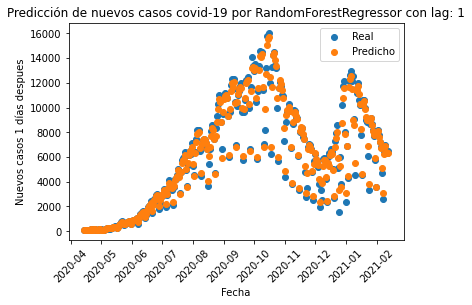

In [8]:
n=1
# Evaluate with train set
print_model(clf, x_train, y_train, 1, n)

mean_squared_error:  2147057.3362726746
mean_absolute_error:  1299.8281714285715
r_mean_squared_error:  1465.2840462765828
max_error:  2426.857
r_score:  0.33584832498858286


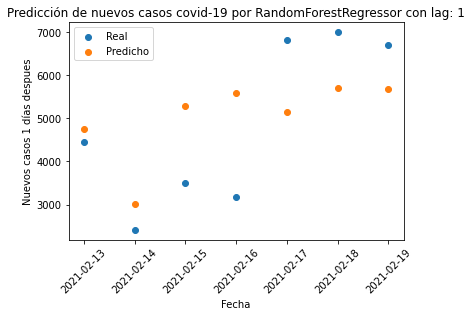

Fecha-------------- Real---- Predicho
2021-02-13 00:00:00 4445.0 4750
2021-02-14 00:00:00 2414.0 3005
2021-02-15 00:00:00 3499.0 5277
2021-02-16 00:00:00 3165.0 5591
2021-02-17 00:00:00 6808.0 5138
2021-02-18 00:00:00 6994.0 5691
2021-02-19 00:00:00 6704.0 5679


In [9]:
print_model(clf, x_test[:7], y_test[:7], 1, n)
print('Fecha--------------', 'Real----', 'Predicho')

#for i, y_pred in enumerate(clf.predict(x_test[:,1:])):
for i, y_pred in enumerate(clf.predict((x_test[:,1:] - x_train_mean) / x_train_std)):
  print(x_test[i,0], y_test[i], int(y_pred))

In [10]:
# Create model 7 day
regr7 = RandomForestRegressor()
clf7 = GridSearchCV(regr7, parameters)
clf7.fit((x_train7[:,1:] - x_train_mean) / x_train_std, y_train7)
 
print('Model parameters found in GridSearch')
for key, value in clf7.best_params_.items():
  print(str(key)+': '+ str(value))

Model parameters found in GridSearch
criterion: mse
max_depth: 5000
n_estimators: 5000
warm_start: False


mean_squared_error:  215484.36327718536
mean_absolute_error:  263.7038583606558
r_mean_squared_error:  464.2029332923106
max_error:  2998.785
r_score:  0.9873291966500238


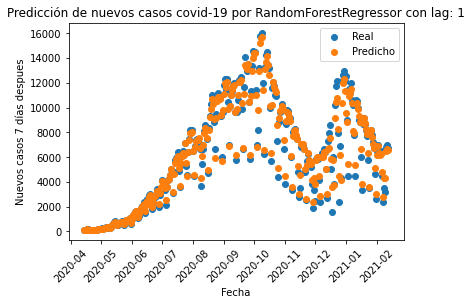

In [11]:
n=1
# Evaluate with train set
print_model(clf7, x_train7, y_train7, 7, n)

mean_squared_error:  584304.0453241714
mean_absolute_error:  608.8377714285714
r_mean_squared_error:  764.3978318416213
max_error:  1432.8739999999998
r_score:  0.6725741499547747


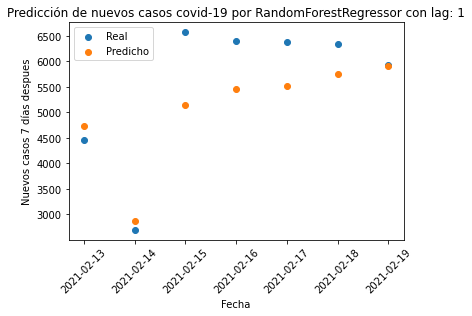

Fecha-------------- Real---- Predicho
2021-02-13 00:00:00 4459.0 4725
2021-02-14 00:00:00 2697.0 2863
2021-02-15 00:00:00 6567.0 5134
2021-02-16 00:00:00 6388.0 5454
2021-02-17 00:00:00 6373.0 5515
2021-02-18 00:00:00 6328.0 5753
2021-02-19 00:00:00 5930.0 5899


In [12]:
print_model(clf7, x_test7[:7], y_test7[:7], 7, n)
print('Fecha--------------', 'Real----', 'Predicho')

#for i, y_pred in enumerate(clf.predict(x_test[:,1:])):
for i, y_pred7 in enumerate(clf7.predict((x_test7[:,1:] - x_train_mean) / x_train_std)):
  print(x_test7[i,0], y_test7[i], int(y_pred7))

In [13]:
#from joblib import dump, load
#dump(clf, 'gdrive/My Drive/Tp-Final-BDM-QuirogaMario-113329/modelos/lag7_predict7_0.93')

['gdrive/My Drive/Tp-Final-BDM-QuirogaMario-113329/modelos/lag7_predict7_0.93']

In [14]:
from sklearn.preprocessing import StandardScaler
 
# Parameters for GridSearchCV
parameters = {'n_estimators': [5, 5000], 
              'criterion': ['mse', 'mae'], 
              'max_depth': [5, 5000],              
              'warm_start': [True, False]}
 
# Create model 14 day
regr14 = RandomForestRegressor()
clf14 = GridSearchCV(regr14, parameters)
clf14.fit((x_train14[:,1:] - x_train_mean) / x_train_std, y_train14)
 
print('Model parameters found in GridSearch')
for key, value in clf14.best_params_.items():
  print(str(key)+': '+ str(value))

Model parameters found in GridSearch
criterion: mse
max_depth: 5000
n_estimators: 5000
warm_start: True


mean_squared_error:  171531.7524669855
mean_absolute_error:  248.24255081967215
r_mean_squared_error:  414.1639198034825
max_error:  2344.0807999999997
r_score:  0.989414644862484


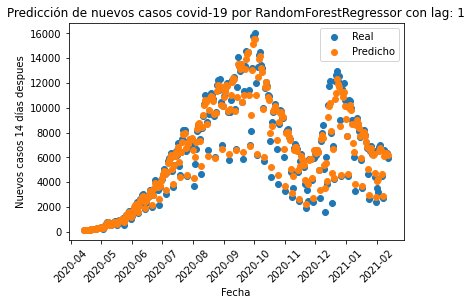

In [15]:
n=1
# Evaluate with train set
print_model(clf14, x_train14, y_train14, 14, n)

mean_squared_error:  449657.9873859199
mean_absolute_error:  595.9110857142857
r_mean_squared_error:  670.5654236433011
max_error:  988.2926000000002
r_score:  0.8205572635469794


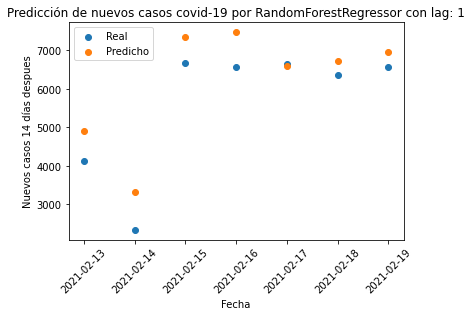

Fecha-------------- Real---- Predicho
2021-02-13 00:00:00 4122.0 4902
2021-02-14 00:00:00 2334.0 3322
2021-02-15 00:00:00 6670.0 7343
2021-02-16 00:00:00 6566.0 7470
2021-02-17 00:00:00 6650.0 6580
2021-02-18 00:00:00 6367.0 6732
2021-02-19 00:00:00 6560.0 6949


In [16]:
print_model(clf14, x_test14[:7], y_test14[:7], 14, n)
print('Fecha--------------', 'Real----', 'Predicho')

#for i, y_pred in enumerate(clf.predict(x_test[:,1:])):
for i, y_pred14 in enumerate(clf14.predict((x_test14[:,1:] - x_train_mean) / x_train_std)):
  print(x_test14[i,0], y_test14[i], int(y_pred14))

In [17]:
from sklearn.preprocessing import StandardScaler
 
# Parameters for GridSearchCV
parameters = {'n_estimators': [5, 5000], 
              'criterion': ['mse', 'mae'], 
              'max_depth': [5, 5000],              
              'warm_start': [True, False]}
 
# Create model 30 day
regr30 = RandomForestRegressor()
clf30 = GridSearchCV(regr30, parameters)
clf30.fit((x_train30[:,1:] - x_train_mean) / x_train_std, y_train30)
 
print('Model parameters found in GridSearch')
for key, value in clf30.best_params_.items():
  print(str(key)+': '+ str(value))

Model parameters found in GridSearch
criterion: mse
max_depth: 5000
n_estimators: 5000
warm_start: False


mean_squared_error:  240759.3510862324
mean_absolute_error:  334.66863606557376
r_mean_squared_error:  490.6723459562729
max_error:  2578.2227999999996
r_score:  0.9832204103379856


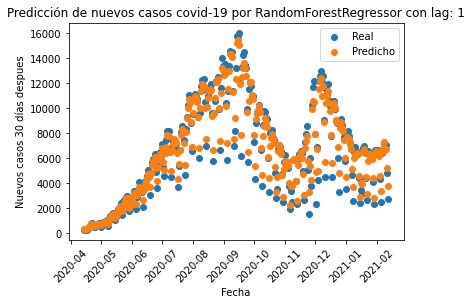

In [18]:
n=1
# Evaluate with train set
print_model(clf30, x_train30, y_train30, 30, n)

mean_squared_error:  6618533.802643657
mean_absolute_error:  2472.2491999999997
r_mean_squared_error:  2572.6511233829697
max_error:  3708.6744
r_score:  -1.5664439126101781


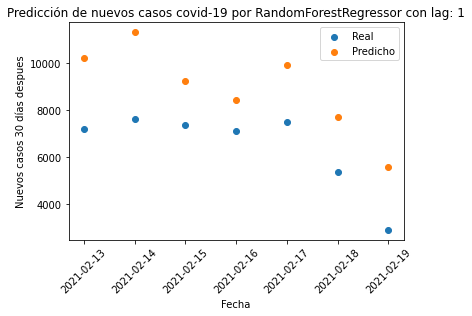

Fecha-------------- Real---- Predicho
2021-02-13 00:00:00 7197.0 10188
2021-02-14 00:00:00 7592.0 11300
2021-02-15 00:00:00 7370.0 9241
2021-02-16 00:00:00 7116.0 8433
2021-02-17 00:00:00 7494.0 9915
2021-02-18 00:00:00 5350.0 7689
2021-02-19 00:00:00 2900.0 5554


In [19]:
print_model(clf30, x_test30[:7], y_test30[:7], 30, n)
print('Fecha--------------', 'Real----', 'Predicho')

#for i, y_pred in enumerate(clf.predict(x_test[:,1:])):
for i, y_pred30 in enumerate(clf30.predict((x_test30[:,1:] - x_train_mean) / x_train_std)):
  print(x_test30[i,0], y_test30[i], int(y_pred30))